In [1]:
from dolfin import *
#Meshandfunctionspace
import matplotlib.pyplot as plt
import NS_solver as ns 
import numpy as np

In [2]:
!dolfin-convert data/mesh/bifurcation.msh data/mesh/bifurcation.xml

Converting from Gmsh format (.msh, .gmsh) to DOLFIN XML format
Expecting 11100 vertices
Found all vertices
Expecting 21006 cells
Found all cells
Conversion done


In [3]:
#Load mesh
meshfile = "data/mesh/bifurcation" 
mesh = Mesh(meshfile + ".xml")
bounds = MeshFunction("size_t", mesh, meshfile + "_facet_region.xml")
face = MeshFunction("size_t", mesh, meshfile + "_physical_region.xml")

In [4]:
n = FacetNormal(mesh)
h = mesh.hmin()

In [5]:
u,p = ns.solve_stokes(bounds,mesh)

Solving linear variational problem.


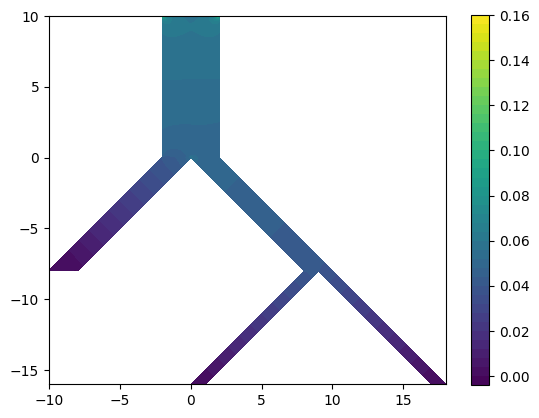

In [6]:
sol = plot(p)
plt.colorbar(sol)

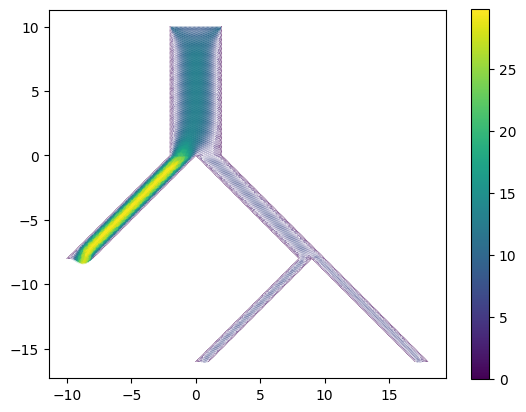

In [7]:
sol = plot(u)
plt.colorbar(sol)

In [8]:
rename_boundaries = MeshFunction("size_t", mesh,1)
rename_boundaries.set_all(0)
n_tags_b = len(np.unique(bounds.array()))
for i in range(n_tags_b):
    rename_boundaries.array()[bounds.array()==4+i] = i+1
ds1 = Measure("dS",domain=mesh, subdomain_data=rename_boundaries)

In [9]:
rename_faces = MeshFunction("size_t", mesh,2)
rename_faces.set_all(0)
n_tags_f = len(np.unique(face.array()))
for i in range(n_tags_b):
    rename_faces.array()[face.array()==4+i] = i+1
dx1 = Measure("dx",domain=mesh, subdomain_data=rename_faces)

In [24]:
flux = dot(u, n('+'))*ds1(1)
total_flux = assemble(flux)
total_flux

28.060222189363174

In [22]:
flux = p*dx1(6)
total_flux = assemble(flux)
total_flux

0.34044809302261336